<span style='color:gray'> <span style="font-size:25px;"> **DIRECT Permeability Predictive model**
    
In this Notebook, the machine learning model will be created and then the data from well-logs DLIS file [after preprocessing, sorting and finalizing the data] is loaded as input for Machine Learning model (ML); 
* Random Forest Regressor
* Gradient Boosting Regressor
    
    
For the prediction of petrophysical properties, such as porosity, permeability and water saturation, these two Regressor models **Random Forest Regressor** and **Gradient Boosting Regressor** are suitable.

They are Ensemble Based Tree Methods; they are based on the generation of Decision Trees.

We use Regression Models since we want to predict a continuous variable.

**Advantages** of the 2 regression models, since they are based on Decision Trees:

* They do not need the normalization or scaling of the original dataset;
* They are not sensitive to outliers, thus, outliers detection and removal are not required.

**==================================================================================================================**
    
In well-log machine learning models, the choice between regression and classification (Supervised ML) depends on the nature of the problem you are trying to solve and the type of data you have. Let's break down the reasons why regression is often preferred over classification in this context:

**Continuous Output**: Well-log data often involves continuous measurements such as porosity, permeability, resistivity, and other geological properties. Regression is well-suited for predicting and modeling continuous numerical values. Classification, on the other hand, is typically used when the output is categorical or discrete, like classifying lithology or rock types.

**Data Distribution**: Well-log data tends to have a wide range of continuous values. Using classification would require discretizing this data into bins or classes, which can lead to loss of information and potentially introduce biases. Regression models can capture the nuances and variations present in the continuous data more effectively.

**Evaluation Metrics**: Regression models are evaluated using metrics such as mean squared error (MSE), root mean squared error (RMSE), or mean absolute error (MAE). These metrics are well-suited for measuring the accuracy of predictions involving continuous values. Classification models, on the other hand, use metrics like accuracy, precision, recall, and F1-score, which are designed for categorical predictions.

**Feature Importance**: Well-log data analysis often involves understanding the relationships between different geological features and the target property. Regression models can provide insights into the quantitative impact of each feature on the predicted values, aiding in geological interpretation.


<span style='color:gray'> <span style="font-size:20px;"> 
**Importing Libraries, Regressors, and Required Dependencies**

In [1]:
%pip install --quiet --upgrade scikit-learn==1.2.2
%pip install --quiet qbstyles


# Importing the dependencies
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from qbstyles import mpl_style
mpl_style(dark=False)  # Set light matplotlib style

import matplotlib.patches as mpatches  # To create a legend with a color box
import pickle

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Importing the models 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
                                         
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold 

# Regression metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_error, mean_absolute_error

# The package "Matplotlib Inline Back-end" provides support for Matplotlib to display figures directly inline
# "svg" stands for "scalable vector graphic". The plot can be scaled without compromising its quality
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


<span style='color:brown'> <span style="font-size:20px;"> **=+=+=+=+=++=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+**</span> </span>

<span style='color:green'> <span style="font-size:25px;"> **Load the dataset**:</span> </span>

<span style='color:blue'> <span style="font-size:15px;"> **Well-log data**:</span> </span>

In [2]:
file_path = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Output of well data 2nd PART, [unique dataframe creation]/df_2nd_part.csv'

df =  pd.read_csv(file_path)
df.reset_index(drop=True, inplace=True)                       # Reset the index
df_F = df.copy()
df

,MD,k,phi,GR,AT90,RHOZ,NPHI,DTCO,PEFZ,NMRFF,NMREFF,NMRTOT
0,5231.10,117.00,13.5,17.943176,16.073359,2.130714,0.297487,67.663246,8.383753,0.137963,0.210700,0.263316
1,5231.20,185.00,18.7,18.042002,11.997000,2.124417,0.312481,67.298560,8.239479,0.131576,0.215271,0.257083
2,5231.60,6.43,12.3,20.989471,8.388942,2.203261,0.309711,65.314200,7.864687,0.097340,0.224917,0.237006
3,5231.95,5.66,12.1,21.451315,20.509071,2.273505,0.276384,67.033295,7.956197,0.079618,0.182904,0.189701
4,5232.25,75.50,19.0,14.067339,57.115368,2.220152,0.296492,68.997250,8.469757,0.085306,0.161510,0.170772
...,...,...,...,...,...,...,...,...,...,...,...,...
268,5792.75,45.90,18.3,17.559164,6.306404,2.521194,0.152604,60.161106,4.334862,0.000975,0.001309,0.001484
269,5793.05,9.60,15.3,20.085897,5.413859,2.487791,0.143288,61.523014,4.714213,0.001059,0.001366,0.001551
270,5793.30,24.20,14.3,19.016800,5.351073,2.489110,0.112343,62.916393,4.976302,0.001140,0.001438,0.001600
271,5794.85,15.40,18.5,19.666580,3.009704,2.474878,0.141756,63.389927,5.481481,0.001111,0.001326,0.001327


================================================================================================================================================================================================================================================

# Heat map

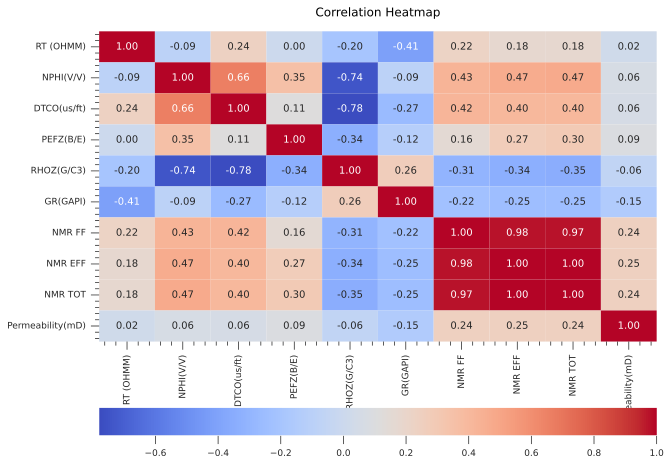

In [3]:
df_F = df_F[df_F['k'] > 0]   # Filter out rows with 'k' values less than or equal to zero

columns_of_interest = ["AT90", "NPHI", "DTCO", "PEFZ", "RHOZ", "GR", "NMRFF", "NMREFF", "NMRTOT", "k"]   # Select the columns of interest
df_F = df_F[columns_of_interest]

# Rename the columns with custom display names
df_F = df_F.rename(columns={
    "AT90": "RT (OHMM)",
    "NPHI": "NPHI(V/V)",
    "DTCO": "DTCO(us/ft)",
    "PEFZ": "PEFZ(B/E)",
    "RHOZ": "RHOZ(G/C3)",
    "GR": "GR(GAPI)",
    "NMRFF": "NMR FF",
    "NMREFF": "NMR EFF",
    "NMRTOT": "NMR TOT",
    "k": "Permeability(mD)"
})

# Calculate the correlation matrix
correlation_matrix = df_F.corr()

# Create a heatmap with horizontal property names on the vertical axis
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={"orientation": "horizontal"})

# Rotate the y-axis labels to be horizontal
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.title("Correlation Heatmap")
plt.show()


# ==========================================================

# Residual Dense Neural Network (DNN)

In [21]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array
from numpy import mean
from numpy import std
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.io import savemat
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import TensorBoard
from keras.models import Sequential,Model
%matplotlib inline

In [22]:
# Filter out rows with 'k' values less than or equal to zero
df = df[df['k'] > 0]

# Define X and y using specific columns after filtering
X = df[["RHOZ", "GR", "AT90", "NPHI", "DTCO", "PEFZ", "NMRFF", "NMREFF", "NMRTOT"]]   #  
y = df[["k"]]

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df.reset_index(drop=True, inplace=True)
print(X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(273, 9) (273, 1) (218, 9) (55, 9) (218, 1) (55, 1)


In [35]:
y_values = y.values.reshape(-1, 1)    # Convert y to a NumPy array and reshape it

scaler_X = StandardScaler()    # Scale your features (X) and the target variable (y)
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

/Users/amirhosseinakhondzadeh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
from keras import layers, models

#input_shape = X_train.shape[:]  # Assuming X_train is a pandas DataFrame or a NumPy array
input_shape = X_train_scaled.shape[:]  # Assuming X_train is a pandas DataFrame or a NumPy array

inputs = keras.Input(shape= shape)

# Hidden layers
X_1 = layers.Dense(128, activation="relu")(inputs)
X_2 = layers.Dense(64, activation="relu")(X_1)
X_3 = layers.Dense(32, activation="relu")(X_2)

# Concatenation 1
x = layers.concatenate([X_1, X_3])

X_4 = layers.Dense(32, activation="relu")(x)
X_5 = layers.Dense(16, activation="relu")(X_4)

# Concatenation 2
x = layers.concatenate([X_3, X_5])

X_6 = layers.Dense(16, activation="relu")(x)
X_7 = layers.Dense(8, activation="relu")(X_6)

# Concatenation 3
x = layers.concatenate([X_5, X_7])

# Output layer
outputs = layers.Dense(1, activation="linear")(x)

# Create the model
model = models.Model(inputs, outputs)

In [37]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 9)]                  0         []                            
                                                                                                  
 dense_32 (Dense)            (None, 128)                  1280      ['input_5[0][0]']             
                                                                                                  
 dense_33 (Dense)            (None, 64)                   8256      ['dense_32[0][0]']            
                                                                                                  
 dense_34 (Dense)            (None, 32)                   2080      ['dense_33[0][0]']            
                                                                                            

In [38]:
from keras.optimizers import Adam
from keras.optimizers.schedules import ExponentialDecay

lr_schedule = ExponentialDecay(initial_learning_rate=1e-3, decay_steps=1000, decay_rate=0.9)
opt = Adam(learning_rate=lr_schedule)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)

In [40]:
from keras.callbacks import TensorBoard

tensorboard_callback = TensorBoard(log_dir='logs')  # Create the TensorBoard callback object

"""model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=500, batch_size=16, callbacks=[tensorboard_callback])  # Pass the callback to the model.fit() call"""

model.fit(X_train_scaled, y_train_scaled, validation_data=(X_test_scaled, y_test_scaled),
          epochs=500, batch_size=16, callbacks=[tensorboard_callback])  # Pass the callback to the model.fit() call

Epoch 1/500
14/14 [==============================] - 0s 17ms/step - loss: 11.8763 - val_loss: 149.1980
Epoch 2/500
14/14 [==============================] - 0s 5ms/step - loss: 11.3038 - val_loss: 150.1217
Epoch 3/500
14/14 [==============================] - 0s 5ms/step - loss: 11.7429 - val_loss: 146.7542
Epoch 4/500
14/14 [==============================] - 0s 4ms/step - loss: 12.2334 - val_loss: 146.9853
Epoch 5/500
14/14 [==============================] - 0s 5ms/step - loss: 12.0369 - val_loss: 148.9180
Epoch 6/500
14/14 [==============================] - 0s 5ms/step - loss: 11.4642 - val_loss: 147.3208
Epoch 7/500
14/14 [==============================] - 0s 5ms/step - loss: 12.0452 - val_loss: 149.9228
Epoch 8/500
14/14 [==============================] - 0s 4ms/step - loss: 12.1971 - val_loss: 147.8472
Epoch 9/500
14/14 [==============================] - 0s 4ms/step - loss: 12.4634 - val_loss: 149.4231
Epoch 10/500
14/14 [==============================] - 0s 4ms/step - loss: 11.0997

In [41]:
trainOutputs = model.predict(X_train)
testOutputs = model.predict(X_test)
alldataOutputs = model.predict(X)
mse_test = mean_squared_error(y_test, testOutputs)
mse_train = mean_squared_error(y_train, trainOutputs)
mse_all = mean_squared_error(y, alldataOutputs)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_test))
print("The mean squared error (MSE) on train set: {:.4f}".format(mse_train))
print("The mean squared error (MSE) on all set: {:.4f}".format(mse_all))

9/9 [==============================] - 0s 1ms/step
The mean squared error (MSE) on test set: 207356.6340
The mean squared error (MSE) on train set: 293800.8617
The mean squared error (MSE) on all set: 276385.3586


# ==========================================================

In [ ]:
# Filter out rows with 'k' values less than or equal to zero
df = df[df['k'] > 0]

# Define X and y using specific columns after filtering
X = df[["RHOZ", "GR", "AT90", "NPHI", "DTCO", "PEFZ", "NMRFF", "NMREFF", "NMRTOT"]]   #  
y = df[["k"]]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df.reset_index(drop=True, inplace=True)
print(X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [44]:
#########
y_values = y.values.reshape(-1, 1)    # Convert y to a NumPy array and reshape it

scaler_X = StandardScaler()    # Scale your features (X) and the target variable (y)
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))
#####


/Users/amirhosseinakhondzadeh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import pandas as pd


svr_model = SVR()    # Define the SVR model

# Define the hyperparameters you want to search through
svr_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Different kernel functions
    'C': [0.01, 0.1, 1, 10, 100, 1000],  # Different values for the regularization parameter C
    'gamma': [1, 10]   #  'gamma': ['scale', 'auto', 1, 10]  # Different values for the RBF kernel parameter gamma
}


#######
# best on
#   'kernel': 'rbf', 'gamma': 1, 'C': 1
#   'kernel': 'rbf', 'gamma': 1, 'C': 10
#   'kernel': 'rbf', 'gamma': 10, 'C': 1

#######

# Perform Grid Search to find the best parameters
svr_random = RandomizedSearchCV(estimator=svr_model, param_distributions=svr_grid, n_iter=10, cv=10, scoring='neg_mean_squared_error')  # neg_mean_squared_error
svr_random.fit(X_train_scaled, y_train_scaled.ravel())

In [ ]:
# Get the best parameters
best_params = svr_random.best_params_
print("Best Parameters:", best_params)

In [9]:
best_neg_mse = svr_random.best_score_
print("Best Negative Mean Squared Error:", best_neg_mse)

Best Negative Mean Squared Error: -0.9699553588462735


In [10]:
highest_accuracy = svr_random.best_score_ 
highest_accuracy

highest_accuracy = round(highest_accuracy,4)
highest_accuracy = highest_accuracy*100
print('Coefficient of Determination for the Random Forest =', highest_accuracy)

Coefficient of Determination for the Random Forest = -97.0


In [11]:
# Train the SVR model with the best parameters
best_svr_model = SVR(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])
best_svr_model.fit(X_scaled, y_scaled.ravel())

SVR(C=1, gamma='auto')

In [12]:
"""r_squared = best_svr_model.score(X_test_scaled, y_test_scaled)
print('Coefficient of Determination for the SVR:', r_squared)

# Convert the R-squared value to a percentage
r_squared_percentage = round(r_squared * 100, 2)
print('Coefficient of Determination for the SVR (as percentage):', r_squared_percentage)"""

"r_squared = best_svr_model.score(X_test_scaled, y_test_scaled)\nprint('Coefficient of Determination for the SVR:', r_squared)\n\n# Convert the R-squared value to a percentage\nr_squared_percentage = round(r_squared * 100, 2)\nprint('Coefficient of Determination for the SVR (as percentage):', r_squared_percentage)"

In [13]:
# Assuming svr_model is already trained and X contains your feature data

# Make predictions using the trained SVR model

y_pred_svr_scaled = best_svr_model.predict(X_scaled)
#y_pred_svr_scaled = best_svr_model.predict(X_test_scaled)

# Inverse transform the scaled predictions to get the original scale
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1))

<function matplotlib.pyplot.show(close=None, block=None)>

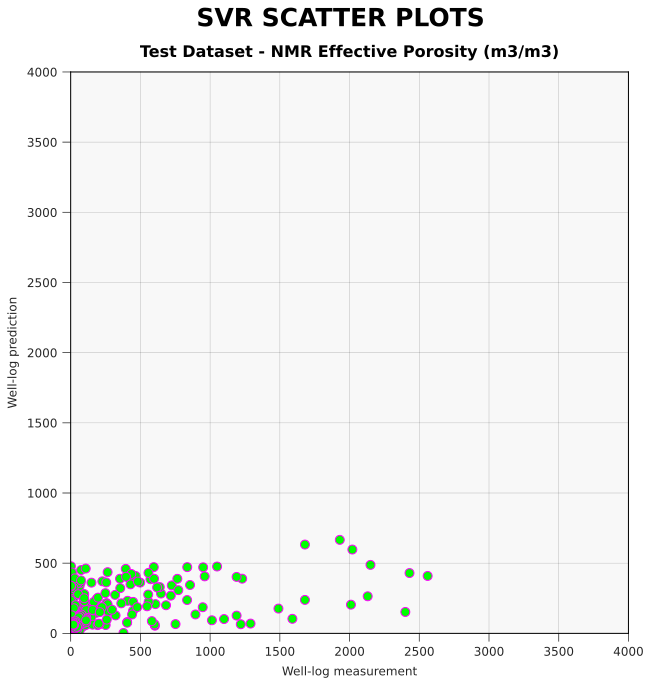

In [15]:
# Random Forest Scatter Plots 
fig, ax = plt.subplots(1,1, figsize=(10,10))
fig.suptitle("SVR SCATTER PLOTS", fontsize=25, fontweight='bold')
fig.subplots_adjust(top=0.89,hspace=0.4)

#Set up the subplots grid
ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1) 

# First Scatter Plot
ax1.scatter(y,y_pred_svr, s=80, c='lime', edgecolors='magenta')
ax1.set_xlabel('Well-log measurement', fontsize=12) 
ax1.set_ylabel('Well-log prediction', fontsize=12)
ax1.set_title('Test Dataset - NMR Effective Porosity (m3/m3)', fontsize=16, fontweight='bold')
#ax1.semilogy()                                                           # x in a log scale
#ax1.semilogx()                                                           # x in a log scale
ax1.set_xlim(0,4000)
ax1.set_ylim(0,4000)
#ax1.set_xticks(np.arange(0, 0.25, 0.025))
#ax1.set_yticks(np.arange(0, 0.25, 0.025))

# Add a black border to each subplot
for ax in [ax1]:
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    
# Set font size of the tick labels
for ax in [ax1]:
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
# Set grid 
for ax in [ax1]:
    ax.grid(color='black',lw=0.5)

plt.show

# ==========================================================

# Tuckey Method:

handle outliers before splitting your data into training and testing sets. This ensures that you are not introducing any data leakage from your test set into your training set during the outlier handling process.

Here's the recommended order of operations:

Handle Outliers: Clean your data by handling outliers using methods like Tukey fences.
Split Data: After handling outliers, split your data into training and testing sets.
Train-Test Split: Use the training set to train your model and the testing set to evaluate its performance.

In [250]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def tukey_fences(data_series, k=1.5):
    q1 = data_series.quantile(0.25)
    q3 = data_series.quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - k * iqr
    upper_fence = q3 + k * iqr
    return lower_fence, upper_fence

def handle_outliers(data_series, lower_fence, upper_fence):
    data_series[data_series < lower_fence] = lower_fence
    data_series[data_series > upper_fence] = upper_fence
    return data_series

# Set the Tukey's k value (you can adjust this based on your data)
k_value = 1.5

# List of predictors to clean
predictors = ["GR", "AT90", "NPHI", "RHOZ", "DTCO", "PEFZ", "NMRFF", "NMREFF", "NMRTOT"]

# Clean outliers in the training set for each predictor
for column_name in predictors:
    lower_fence, upper_fence = tukey_fences(X_train[column_name], k_value)
    X_train[column_name] = handle_outliers(X_train[column_name], lower_fence, upper_fence)

# Print the cleaned training set
X_train

,GR,AT90,NPHI,RHOZ,DTCO,PEFZ,NMRFF,NMREFF,NMRTOT
33,9.828955,1346.838900,0.144230,2.448925,69.356590,4.418651,0.122529,0.152875,0.160839
186,13.900700,1080.117900,0.142353,2.414187,64.776825,5.861917,0.001315,0.001613,0.001613
144,23.203905,1306.516800,0.191551,2.384904,67.453840,4.552339,0.090426,0.123171,0.123171
199,16.903805,510.980500,0.183806,2.388104,66.294590,5.049816,0.001511,0.001663,0.001812
37,16.776194,318.007320,0.139302,2.386084,66.892670,5.309785,0.132417,0.181065,0.185002
...,...,...,...,...,...,...,...,...,...
188,13.166554,1085.951900,0.111585,2.463952,63.389236,5.379018,0.001273,0.001326,0.001326
71,34.770267,54.087597,0.193112,2.484332,64.476920,5.032398,0.118632,0.152444,0.161366
106,31.437082,13.390741,0.194010,2.486679,68.546646,4.903046,0.123350,0.152665,0.152668
270,19.016800,5.351073,0.112343,2.489110,62.916393,4.976302,0.001140,0.001438,0.001600


# ================================================

<span style='color:gray'> <span style="font-size:30px;">**Build the model**</span> </span>

# Random Forest

Normalization:

In [8]:
"""# Apply Min-Max scaling to predictors
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)"""

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming X_train and X_test are your well log data for training and testing respectively

scaler = MinMaxScaler()
# Convert DataFrames to numpy arrays for scaling
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape and scale the data
X_train_scaled = scaler.fit_transform(X_train_array.reshape(-1, X_train_array.shape[-1])).reshape(X_train_array.shape)
X_test_scaled = scaler.transform(X_test_array.reshape(-1, X_test_array.shape[-1])).reshape(X_test_array.shape)

########

# Logarithmic transformation on y_train
log_transformed_y_train = np.log1p(y_train)  # Applying log transformation, adding 1 to avoid log of zero or negative values

# Logarithmic transformation on y_test
log_transformed_y_test = np.log1p(y_test)  # Applying log transformation, adding 1 to avoid log of zero or negative values

In [9]:
rf_n_estimators = [100, 150, 200, 250, 300, 350, 400]
rf_max_depth = [5, 10, 15, 20, 25]
rf_criterion = ['squared_error']                         # "squared_error" is by default. It is optional

rf_grid = {'n_estimators': rf_n_estimators,
           'max_depth': rf_max_depth,
           'criterion': rf_criterion}

In [10]:
rf_model = RandomForestRegressor(random_state=42)        # Shuffle=True by default

rf_random = RandomizedSearchCV(rf_model, rf_grid, n_iter=20, cv=10, random_state=42)


rf_random.fit(X_train_scaled, log_transformed_y_train.values.ravel())
#rf_random.fit(X_train, log_transformed_y_train.values.ravel())

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20,
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': [5, 10, 15, 20, 25],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400]},
                   random_state=42)

In [11]:
best_parameters = rf_random.best_params_
print(best_parameters)

{'n_estimators': 100, 'max_depth': 5, 'criterion': 'squared_error'}


In [12]:
highest_accuracy = rf_random.best_score_ 
highest_accuracy

0.07325662128580451

In [13]:
highest_accuracy = round(highest_accuracy,4)
highest_accuracy = highest_accuracy*100
print('Coefficient of Determination for the Random Forest =', highest_accuracy)

Coefficient of Determination for the Random Forest = 7.33


In [14]:
rf_final_model = RandomForestRegressor(
    n_estimators=best_parameters['n_estimators'],
    max_depth=best_parameters['max_depth'],
    random_state=42,
    criterion=best_parameters['criterion']
)

Reverse the data for final fitting

In [15]:
"""X_train = scaler.inverse_transform(X_train_scaled)
X_test = scaler.inverse_transform(X_test_scaled)
#################
y_train = np.expm1(log_transformed_y_train)   # Reverse logarithmic transformation for y_train
y_test = np.expm1(log_transformed_y_test)   # Reverse logarithmic transformation for y_test"""

'X_train = scaler.inverse_transform(X_train_scaled)\nX_test = scaler.inverse_transform(X_test_scaled)\n#################\ny_train = np.expm1(log_transformed_y_train)   # Reverse logarithmic transformation for y_train\ny_test = np.expm1(log_transformed_y_test)   # Reverse logarithmic transformation for y_test'

In [16]:
#rf_final_model.fit(X_train, y_train.values.ravel())
rf_final_model.fit(X_train, log_transformed_y_train.values.ravel())
#rf_final_model.fit(X_train_scaled, log_transformed_y_train.values.ravel())

RandomForestRegressor(max_depth=5, random_state=42)

In [17]:
y_pred_rf = rf_final_model.predict(X)   # Make predictions on the test data
Y = np.log1p(y)  # Applying log transformation, adding 1 to avoid log of zero or negative values

#y_prediction_rf = np.expm1(y_pred_rf)   # Reverse logarithmic transformation for y_train

#Y = np.log1p(y)  # Applying log transformation, adding 1 to avoid log of zero or negative values

# plot

<function matplotlib.pyplot.show(close=None, block=None)>

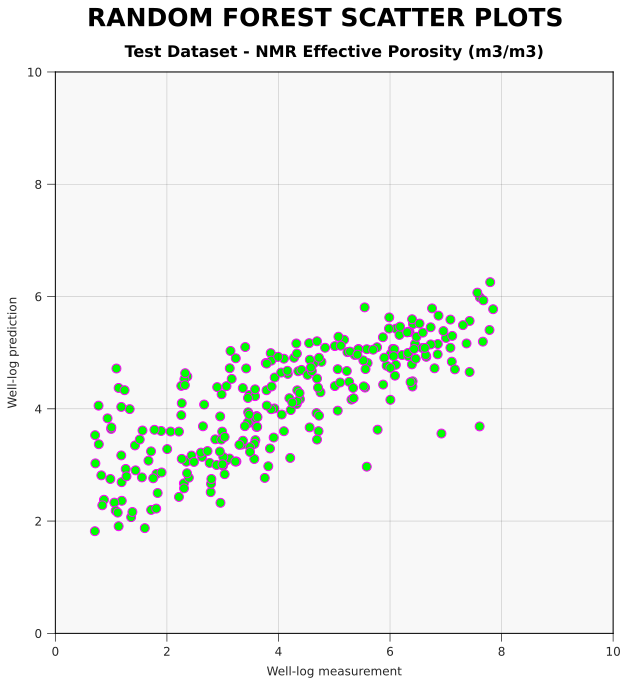

In [18]:
# Random Forest Scatter Plots 
fig, ax = plt.subplots(1,1, figsize=(10,10))
fig.suptitle("RANDOM FOREST SCATTER PLOTS", fontsize=25, fontweight='bold')
fig.subplots_adjust(top=0.89,hspace=0.4)

#Set up the subplots grid
ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1) 

# First Scatter Plot
ax1.scatter(Y,y_pred_rf, s=80, c='lime', edgecolors='magenta')
ax1.set_xlabel('Well-log measurement', fontsize=12) 
ax1.set_ylabel('Well-log prediction', fontsize=12)
ax1.set_title('Test Dataset - NMR Effective Porosity (m3/m3)', fontsize=16, fontweight='bold')
#ax1.semilogy()                                                           # x in a log scale
#ax1.semilogx()                                                           # x in a log scale
ax1.set_xlim(0,10)
ax1.set_ylim(0,10)
#ax1.set_xticks(np.arange(0, 0.25, 0.025))
#ax1.set_yticks(np.arange(0, 0.25, 0.025))

# Add a black border to each subplot
for ax in [ax1]:
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    
# Set font size of the tick labels
for ax in [ax1]:
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
# Set grid 
for ax in [ax1]:
    ax.grid(color='black',lw=0.5)

plt.show

# ======================================================

# Gradient Boosting

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.layers import Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import concatenate
import numpy as np
import argparse
import locale
import os

# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense

In [124]:
# Filter out rows with 'k' values less than or equal to zero
df = df[df['k'] > 0]

# Define X and y using specific columns after filtering
X = df[["RHOZ", "GR", "AT90", "NPHI", "DTCO", "PEFZ", "NMRFF", "NMREFF", "NMRTOT"]]   #  
y = df[["k"]]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df.reset_index(drop=True, inplace=True)
print(X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)


#############################################

scaler_X = StandardScaler()    # Scale your features (X) and the target variable (y)
#scaler_y = StandardScaler()


#==========
X_scaled = scaler_X.fit_transform(X)
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)




y_scaled = scaler_y.fit_transform(y)
y_train_scaled = scaler_y.fit_transform(y_train)
#y_train_scaled = np.log1p(y_train)  
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))
#y_test_scaled = np.log1p(y_test)  

(273, 9) (273, 1) (218, 9) (55, 9) (218, 1) (55, 1)


/Users/amirhosseinakhondzadeh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [125]:
params = {'n_estimators': 1000,
          'max_depth': 7,
          'min_samples_split': 5,
          'learning_rate': 0.01}

In [126]:
gb_model = GradientBoostingRegressor(**params)
gb_model.fit(X_train_scaled, y_train_scaled)
#gb_model.fit(X_train_scaled, y_train)

/Users/amirhosseinakhondzadeh/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.01, max_depth=7, min_samples_split=5,
                          n_estimators=1000)

In [127]:
"""X_scaled = np.log1p(X)  

trainOutputs = gb_model.predict(X_train_scaled)
testOutputs = gb_model.predict(X_test_scaled)
alldataOutputs = gb_model.predict(X_scaled)

y_pred_gb_y_train = scaler_y.inverse_transform(trainOutputs.reshape(-1, 1))
y_pred_gb_y_test = scaler_y.inverse_transform(testOutputs.reshape(-1, 1))
y_pred_gb_y = scaler_y.inverse_transform(alldataOutputs.reshape(-1, 1))"""

'X_scaled = np.log1p(X)  \n\ntrainOutputs = gb_model.predict(X_train_scaled)\ntestOutputs = gb_model.predict(X_test_scaled)\nalldataOutputs = gb_model.predict(X_scaled)\n\ny_pred_gb_y_train = scaler_y.inverse_transform(trainOutputs.reshape(-1, 1))\ny_pred_gb_y_test = scaler_y.inverse_transform(testOutputs.reshape(-1, 1))\ny_pred_gb_y = scaler_y.inverse_transform(alldataOutputs.reshape(-1, 1))'

In [129]:
trainOutputs = gb_model.predict(X_train_scaled)
testOutputs = gb_model.predict(X_test_scaled)
alldataOutputs = gb_model.predict(X_scaled)


y_pred_gb_y_train = scaler_y.inverse_transform(trainOutputs.reshape(-1, 1))
y_pred_gb_y_test = scaler_y.inverse_transform(testOutputs.reshape(-1, 1))
y_pred_gb_y = scaler_y.inverse_transform(alldataOutputs.reshape(-1, 1))

"""
y_pred_gb_y_train = np.expm1(trainOutputs)
y_pred_gb_y_test = np.expm1(testOutputs)
y_pred_gb_y = np.expm1(alldataOutputs)
"""

'\ny_pred_gb_y_train = np.expm1(trainOutputs)\ny_pred_gb_y_test = np.expm1(testOutputs)\ny_pred_gb_y = np.expm1(alldataOutputs)\n'

<function matplotlib.pyplot.show(close=None, block=None)>

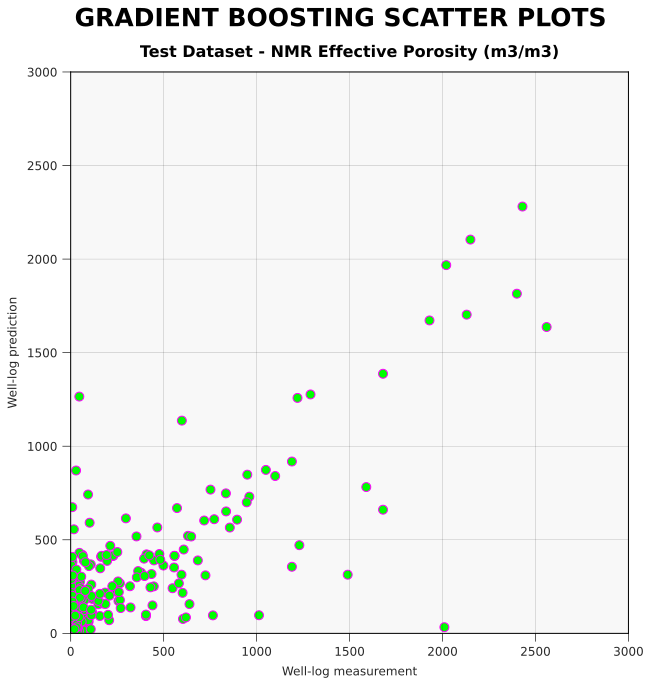

In [131]:
# Random Forest Scatter Plots 
fig, ax = plt.subplots(1,1, figsize=(10,10))
fig.suptitle("GRADIENT BOOSTING SCATTER PLOTS", fontsize=25, fontweight='bold')
fig.subplots_adjust(top=0.89,hspace=0.4)

#Set up the subplots grid
ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1) 

# First Scatter Plot
ax1.scatter(y,y_pred_gb_y, s=80, c='lime', edgecolors='magenta')
#ax1.scatter(y,y_pred_gb_y, s=80, c='lime', edgecolors='magenta')

ax1.set_xlabel('Well-log measurement', fontsize=12) 
ax1.set_ylabel('Well-log prediction', fontsize=12)
ax1.set_title('Test Dataset - NMR Effective Porosity (m3/m3)', fontsize=16, fontweight='bold')
#ax1.semilogy()                                                           # x in a log scale
#ax1.semilogx()                                                           # x in a log scale
ax1.set_xlim(0,3000)
ax1.set_ylim(0,3000)
#ax1.set_xticks(np.arange(0, 0.25, 0.025))
#ax1.set_yticks(np.arange(0, 0.25, 0.025))

# Add a black border to each subplot
for ax in [ax1]:
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    
# Set font size of the tick labels
for ax in [ax1]:
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
# Set grid 
for ax in [ax1]:
    ax.grid(color='black',lw=0.5)

plt.show

In [ ]:

mse_test = mean_squared_error(y_test, y_pred_gb_y_test)
mse_train = mean_squared_error(y_train, y_pred_gb_y_train)
mse_all = mean_squared_error(y, y_pred_gb_y)

print("The mean squared error (MSE) on test set: {:.4f}".format(mse_test))
print("The mean squared error (MSE) on train set: {:.4f}".format(mse_train))
print("The mean squared error (MSE) on all set: {:.4f}".format(mse_all))

train and test data with log transfer y

# ======================================

# GB

In [248]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.layers import Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import concatenate
import numpy as np
import argparse
import locale
import os

# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense

In [249]:
file_path = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Output of well data 2nd PART, [unique dataframe creation]/df_2nd_part.csv'

df =  pd.read_csv(file_path)
df.reset_index(drop=True, inplace=True)                       # Reset the index
df_F = df.copy()
#df

In [250]:
# Filter out rows with 'k' values less than or equal to zero
df = df[df['k'] > 0]

X = df[["GR", "AT90", "NPHI", "RHOZ", "DTCO", "PEFZ"]]
#X = df[["AT90", "NPHI", "DTCO", "PEFZ"]]
y = df[["k"]]

In [251]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, you can reset the index
df.reset_index(drop=True, inplace=True)

print(X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(382, 6) (382, 1) (305, 6) (77, 6) (305, 1) (77, 1)


In [241]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def tukey_fences(data_series, k=1.5):
    q1 = data_series.quantile(0.25)
    q3 = data_series.quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - k * iqr
    upper_fence = q3 + k * iqr
    return lower_fence, upper_fence

def handle_outliers(data_series, lower_fence, upper_fence):
    data_series[data_series < lower_fence] = lower_fence
    data_series[data_series > upper_fence] = upper_fence
    return data_series

# Set the Tukey's k value (you can adjust this based on your data)
k_value = 2

# List of predictors to clean
predictors = ["GR", "AT90", "RHOZ", "NPHI", "DTCO", "PEFZ"]
#predictors = ["AT90", "NPHI", "DTCO", "PEFZ"]

# Clean outliers in the training set for each predictor
for column_name in predictors:
    lower_fence, upper_fence = tukey_fences(X_train[column_name], k_value)
    X_train[column_name] = handle_outliers(X_train[column_name], lower_fence, upper_fence)

# Print the cleaned training set
X_train

,GR,AT90,NPHI,RHOZ,DTCO,PEFZ
175,22.537579,918.899600,0.178862,2.477144,65.864090,4.311600
344,32.083153,43.089897,0.074783,2.441714,62.887848,5.287592
237,39.245403,23.027239,0.109802,2.572710,58.497480,4.924894
100,14.131701,24.772932,0.127180,2.544938,63.372013,5.833971
250,49.269375,406.280400,0.050144,2.656086,54.882930,3.872518
...,...,...,...,...,...,...
73,19.192392,1692.513100,0.060526,2.597283,61.686783,5.033158
112,18.335945,252.203050,0.156692,2.504299,62.553410,5.857372
289,21.381065,304.999150,0.147177,2.477672,63.368275,4.996676
372,63.307427,33.887230,0.136306,2.577619,54.627820,4.325068


In [252]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling to predictors
scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#######
# Logarithmic transformation on y_train
log_transformed_y_train = np.log1p(y_train)  # Applying log transformation, adding 1 to avoid log of zero or negative values

# Shifting by a constant (1 here) before applying log transformation
shifted_log_transformed_y_train = np.log1p(log_transformed_y_train + 1)  # Adding 1 before log to shift the values
y_train = shifted_log_transformed_y_train


# Logarithmic transformation on y_test
log_transformed_y_test = np.log1p(y_test)  # Applying log transformation, adding 1 to avoid log of zero or negative values

# Shifting by a constant (1 here) before applying log transformation
shifted_log_transformed_y_test = np.log1p(log_transformed_y_test + 1)  # Adding 1 before log to shift the values
y_test = shifted_log_transformed_y_test


In [253]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

"""# Define the hyperparameter grid
gb_n_estimators = [100, 150, 200, 250, 300, 350, 400]
gb_max_depth = [5, 10, 15, 20, 25]
gb_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
gb_criterion = ['friedman_mse', 'squared_error']  # Valid options

gb_grid = {
    'n_estimators': gb_n_estimators,
    'max_depth': gb_max_depth,
    'learning_rate': gb_rate,
    'criterion': gb_criterion
}"""
# Expanding the hyperparameter grid
gb_n_estimators = [100, 150, 200, 250, 300, 350, 400, 450, 500]
gb_max_depth = [5, 10, 15, 20, 25, 30]
gb_rate = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
gb_criterion = ['friedman_mse', 'squared_error']  # Expanded options

# Update the grid with expanded values
gb_grid = {
    'n_estimators': gb_n_estimators,
    'max_depth': gb_max_depth,
    'learning_rate': gb_rate,
    'criterion': gb_criterion
}

# Create the base GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Create the random search Gradient Boosting
gb_random = RandomizedSearchCV(gb_model, gb_grid, n_iter=20, cv=10, random_state=42)
#gb_random = RandomizedSearchCV(gb_model, gb_grid, n_iter=10, cv=10, random_state=42, error_score='raise')


# Fit the model
gb_random.fit(X_train_scaled, y_train.values.ravel())  # Assuming you have defined X_train and y_train

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=20,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=42)

In [254]:
gb_random.cv_results_

{'mean_fit_time': array([0.23842895, 0.37834837, 0.3188864 , 0.46148536, 0.21022048,
        0.53626285, 0.19547739, 0.33052037, 0.37175672, 0.54249856,
        0.24216123, 0.24346857, 0.27752538, 0.21927419, 0.31442838,
        0.23457251, 0.43814428, 0.37472064, 0.72265539, 0.28025761]),
 'std_fit_time': array([0.0059481 , 0.00138095, 0.00760791, 0.01979401, 0.00467873,
        0.01563735, 0.00294897, 0.00844566, 0.00949635, 0.01251379,
        0.00932837, 0.00976185, 0.00621126, 0.00939936, 0.00927197,
        0.00578099, 0.02464818, 0.00106405, 0.02665192, 0.00270931]),
 'mean_score_time': array([0.0010396 , 0.00110247, 0.00103045, 0.00149686, 0.00103233,
        0.00156529, 0.00096049, 0.00116017, 0.001196  , 0.00130789,
        0.00100377, 0.00100546, 0.00101137, 0.00100303, 0.00117469,
        0.00097747, 0.00146058, 0.0010963 , 0.00194657, 0.00119479]),
 'std_score_time': array([8.61551325e-05, 2.21579127e-05, 4.33640074e-05, 7.54674497e-05,
        6.17431808e-05, 2.75131425e-

In [255]:
best_parameters = gb_random.best_params_
print(best_parameters)  

{'n_estimators': 450, 'max_depth': 5, 'learning_rate': 0.3, 'criterion': 'friedman_mse'}


In [256]:
highest_accuracy = gb_random.best_score_
highest_accuracy = round(highest_accuracy,3)
highest_accuracy = highest_accuracy*100
print('Coefficient of Determination for the Gradient Boosting =', highest_accuracy)

Coefficient of Determination for the Gradient Boosting = 3.5999999999999996


In [257]:
# Access the best parameters from the RandomizedSearchCV results
best_parameters = gb_random.best_params_

# Create the final GradientBoostingRegressor model
gb_final_model = GradientBoostingRegressor(n_estimators=best_parameters['n_estimators'],
                                           max_depth=best_parameters['max_depth'],
                                           learning_rate=best_parameters['learning_rate'],
                                           random_state=42,
                                           criterion=best_parameters['criterion'])

# reverse

In [233]:
X_train = scaler.inverse_transform(X_train_scaled)
X_test = scaler.inverse_transform(X_test_scaled)
#################
# Reverse shifting operation for y_train
reversed_log_transformed_y_train = np.expm1(shifted_log_transformed_y_train) - 1  # Applying inverse of log1p: expm1 and then subtracting 1
reversed_y_train = np.expm1(reversed_log_transformed_y_train)   # Reverse logarithmic transformation for y_train
y_train = reversed_y_train



# Reverse shifting operation for y_test
reversed_log_transformed_y_test = np.expm1(shifted_log_transformed_y_test) - 1  # Applying inverse of log1p: expm1 and then subtracting 1
reversed_y_test = np.expm1(reversed_log_transformed_y_test)   # Reverse logarithmic transformation for y_test
y_test = reversed_y_test

'# Reverse shifting operation for y_train\nreversed_log_transformed_y_train = np.expm1(shifted_log_transformed_y_train) - 1  # Applying inverse of log1p: expm1 and then subtracting 1\nreversed_y_train = np.expm1(reversed_log_transformed_y_train)   # Reverse logarithmic transformation for y_train\ny_train = reversed_y_train\n\n\n\n# Reverse shifting operation for y_test\nreversed_log_transformed_y_test = np.expm1(shifted_log_transformed_y_test) - 1  # Applying inverse of log1p: expm1 and then subtracting 1\nreversed_y_test = np.expm1(reversed_log_transformed_y_test)   # Reverse logarithmic transformation for y_test\ny_test = reversed_y_test'

In [234]:
gb_final_model.fit(X_train, y_train.values.ravel())  # Apply .values.ravel() here
#gb_final_model.fit(X_train_scaled, y_train.values.ravel()) 

GradientBoostingRegressor(criterion='squared_error', learning_rate=0.3,
                          max_depth=5, n_estimators=300, random_state=42)

In [235]:
# Train the tuned Gradient Boosting 

#X_scaled = scaler.fit_transform(X)
y_pred_gb = gb_final_model.predict(X)   # Make predictions on the test data


# Use the model for prediction
#y_pred = model.predict(X_test_scaled)


/Users/amirhosseinakhondzadeh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

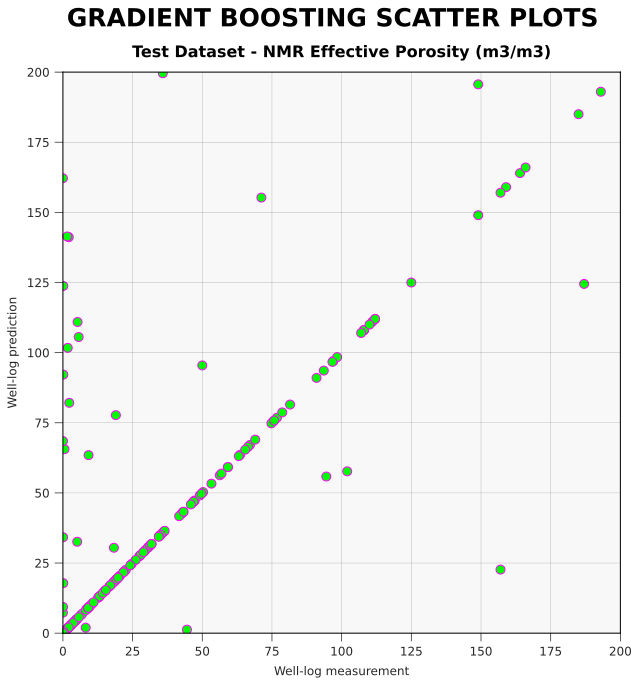

In [236]:
# Random Forest Scatter Plots 
fig, ax = plt.subplots(1,1, figsize=(10,10))
fig.suptitle("GRADIENT BOOSTING SCATTER PLOTS", fontsize=25, fontweight='bold')
fig.subplots_adjust(top=0.89,hspace=0.4)

#Set up the subplots grid
ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1) 

# First Scatter Plot
ax1.scatter(y,y_pred_gb, s=80, c='lime', edgecolors='magenta')
ax1.set_xlabel('Well-log measurement', fontsize=12) 
ax1.set_ylabel('Well-log prediction', fontsize=12)
ax1.set_title('Test Dataset - NMR Effective Porosity (m3/m3)', fontsize=16, fontweight='bold')
#ax1.semilogy()                                                           # x in a log scale
#ax1.semilogx()                                                           # x in a log scale
ax1.set_xlim(0,200)
ax1.set_ylim(0,200)
#ax1.set_xticks(np.arange(0, 0.25, 0.025))
#ax1.set_yticks(np.arange(0, 0.25, 0.025))

# Add a black border to each subplot
for ax in [ax1]:
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    
# Set font size of the tick labels
for ax in [ax1]:
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
# Set grid 
for ax in [ax1]:
    ax.grid(color='black',lw=0.5)

plt.show

# ========

# ANN

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.layers import Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import concatenate
import numpy as np
import argparse
import locale
import os

# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense

In [197]:
file_path = '/Users/amirhosseinakhondzadeh/CODE_WELLLOGS/Petrobras Well-log Analysis/Processed Data (out put of preprocessing == Input of ML)/Output of well data 2nd PART, [unique dataframe creation]/df_2nd_part.csv'

df =  pd.read_csv(file_path)
df.reset_index(drop=True, inplace=True)                       # Reset the index
df_F = df.copy()
df

,MD,k,phi,GR,AT90,RHOZ,NPHI,DTCO,PEFZ,NMRFF,NMREFF,NMRTOT
0,5231.10,117.00,13.5,17.943176,16.073359,2.130714,0.297487,67.663246,8.383753,0.137963,0.210700,0.263316
1,5231.20,185.00,18.7,18.042002,11.997000,2.124417,0.312481,67.298560,8.239479,0.131576,0.215271,0.257083
2,5231.60,6.43,12.3,20.989471,8.388942,2.203261,0.309711,65.314200,7.864687,0.097340,0.224917,0.237006
3,5231.95,5.66,12.1,21.451315,20.509071,2.273505,0.276384,67.033295,7.956197,0.079618,0.182904,0.189701
4,5232.25,75.50,19.0,14.067339,57.115368,2.220152,0.296492,68.997250,8.469757,0.085306,0.161510,0.170772
...,...,...,...,...,...,...,...,...,...,...,...,...
401,5792.75,45.90,18.3,17.559164,6.306404,2.521194,0.152604,60.161106,4.334862,0.000975,0.001309,0.001484
402,5793.05,9.60,15.3,20.085897,5.413859,2.487791,0.143288,61.523014,4.714213,0.001059,0.001366,0.001551
403,5793.30,24.20,14.3,19.016800,5.351073,2.489110,0.112343,62.916393,4.976302,0.001140,0.001438,0.001600
404,5794.85,15.40,18.5,19.666580,3.009704,2.474878,0.141756,63.389927,5.481481,0.001111,0.001326,0.001327


In [198]:
# Filter out rows with 'k' values less than or equal to zero
df = df[df['k'] > 0]

X = df[["GR", "AT90", "NPHI", "RHOZ", "DTCO", "PEFZ"]]
#X = df[["AT90", "NPHI", "DTCO", "PEFZ"]]
y = df[["k"]]

In [199]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, you can reset the index
df.reset_index(drop=True, inplace=True)

print(X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(382, 6) (382, 1) (305, 6) (77, 6) (305, 1) (77, 1)


In [195]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def tukey_fences(data_series, k=1.5):
    q1 = data_series.quantile(0.25)
    q3 = data_series.quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - k * iqr
    upper_fence = q3 + k * iqr
    return lower_fence, upper_fence

def handle_outliers(data_series, lower_fence, upper_fence):
    data_series[data_series < lower_fence] = lower_fence
    data_series[data_series > upper_fence] = upper_fence
    return data_series

# Set the Tukey's k value (you can adjust this based on your data)
k_value = 2

# List of predictors to clean
predictors = ["GR", "AT90", "RHOZ", "NPHI", "DTCO", "PEFZ"]
#predictors = ["AT90", "NPHI", "DTCO", "PEFZ"]

# Clean outliers in the training set for each predictor
for column_name in predictors:
    lower_fence, upper_fence = tukey_fences(X_train[column_name], k_value)
    X_train[column_name] = handle_outliers(X_train[column_name], lower_fence, upper_fence)

# Print the cleaned training set
X_train

,GR,AT90,NPHI,RHOZ,DTCO,PEFZ
175,22.537579,918.899600,0.178862,2.477144,65.864090,4.311600
344,32.083153,43.089897,0.074783,2.441714,62.887848,5.287592
237,39.245403,23.027239,0.109802,2.572710,58.497480,4.924894
100,14.131701,24.772932,0.127180,2.544938,63.372013,5.833971
250,49.269375,406.280400,0.050144,2.656086,54.882930,3.872518
...,...,...,...,...,...,...
73,19.192392,1692.513100,0.060526,2.597283,61.686783,5.033158
112,18.335945,252.203050,0.156692,2.504299,62.553410,5.857372
289,21.381065,304.999150,0.147177,2.477672,63.368275,4.996676
372,63.307427,33.887230,0.136306,2.577619,54.627820,4.325068


In [200]:
# Apply Min-Max scaling to predictors
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#######
# Logarithmic transformation on y_train
log_transformed_y_train = np.log1p(y_train)  # Applying log transformation, adding 1 to avoid log of zero or negative values

# Shifting by a constant (1 here) before applying log transformation
shifted_log_transformed_y_train = np.log1p(log_transformed_y_train + 1)  # Adding 1 before log to shift the values
y_train = shifted_log_transformed_y_train


# Logarithmic transformation on y_test
log_transformed_y_test = np.log1p(y_test)  # Applying log transformation, adding 1 to avoid log of zero or negative values

# Shifting by a constant (1 here) before applying log transformation
shifted_log_transformed_y_test = np.log1p(log_transformed_y_test + 1)  # Adding 1 before log to shift the values
y_test = shifted_log_transformed_y_test


In [201]:
# Define the model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='linear'))  # Output layer

# Define your own learning rate
learning_rate = 0.001

# Pass the learning rate to the optimizer
optimizer = Adam(learning_rate=learning_rate)

# Use this optimizer in the compile step
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [202]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32)

Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 1.2654
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7760
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 0.4502
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3253
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3203
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.3089
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2990
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2957
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2918
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2889
Epoch 11/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2859
Epoch 12/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2849
Epoch 13/50
10/10 [==============================

In [203]:
X_train = scaler.inverse_transform(X_train_scaled)
X_test = scaler.inverse_transform(X_test_scaled)
# Use the model for prediction
#y_pred = model.predict(X_test_scaled)
y_pred = model.predict(X)

#################
# Reverse shifting operation for y_train
reversed_log_transformed_y_train = np.expm1(shifted_log_transformed_y_train) - 1  # Applying inverse of log1p: expm1 and then subtracting 1
reversed_y_train = np.expm1(reversed_log_transformed_y_train)   # Reverse logarithmic transformation for y_train
y_train = reversed_y_train



# Reverse shifting operation for y_test
reversed_log_transformed_y_test = np.expm1(shifted_log_transformed_y_test) - 1  # Applying inverse of log1p: expm1 and then subtracting 1
reversed_y_test = np.expm1(reversed_log_transformed_y_test)   # Reverse logarithmic transformation for y_test
y_test = reversed_y_test

12/12 [==============================] - 0s 1ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

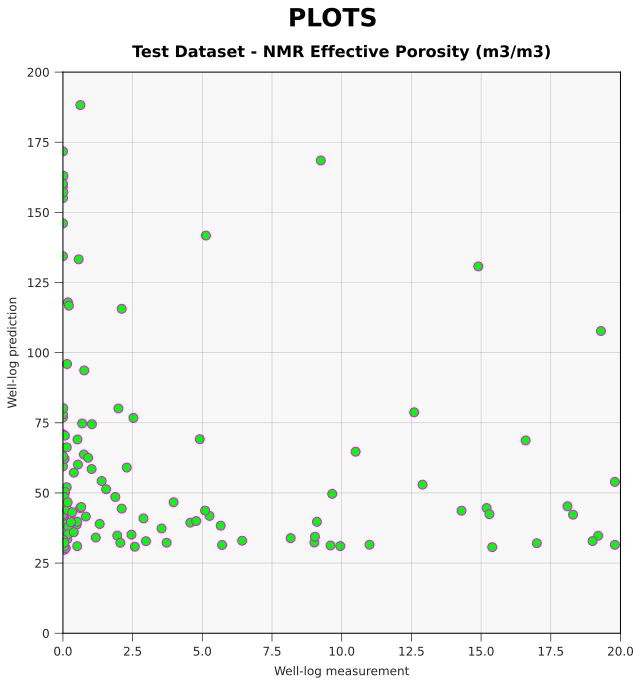

In [205]:
# Random Forest Scatter Plots 
fig, ax = plt.subplots(1,1, figsize=(10,10))
fig.suptitle("PLOTS", fontsize=25, fontweight='bold')
fig.subplots_adjust(top=0.89,hspace=0.4)

#Set up the subplots grid
ax1 = plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1) 

# First Scatter Plot
ax1.scatter(y,y_pred, s=80, c='lime', edgecolors='magenta')
ax1.set_xlabel('Well-log measurement', fontsize=12) 
ax1.set_ylabel('Well-log prediction', fontsize=12)
ax1.set_title('Test Dataset - NMR Effective Porosity (m3/m3)', fontsize=16, fontweight='bold')
#ax1.semilogy()                                                           # x in a log scale
#ax1.semilogx()                                                           # x in a log scale
ax1.set_xlim(0,20)
ax1.set_ylim(0,200)
#ax1.set_xticks(np.arange(0, 0.25, 0.025))
#ax1.set_yticks(np.arange(0, 0.25, 0.025))

# Add a black border to each subplot
for ax in [ax1]:
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    
# Set font size of the tick labels
for ax in [ax1]:
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
# Set grid 
for ax in [ax1]:
    ax.grid(color='black',lw=0.5)

plt.show

# =================================================

# =================================================

# Convolutional Neural Network (CNN)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Function to create a model with specified hyperparameters
def create_model(neurons=20, optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))  # Input layer with neurons
    model.add(Dense(1))  # Output layer

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    return model

# Function to train the model with early stopping
def train_model(X_train, y_train, X_val, y_val, neurons=20, optimizer='adam', epochs=100, batch_size=32):
    model = create_model(neurons=neurons, optimizer=optimizer)

    early_stopping = EarlyStopping(monitor='val_loss', patience=5)

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val),
                        callbacks=[early_stopping], verbose=0)

    return model, history

# Assuming 'df' contains the necessary data columns
# Filter out rows with 'k' values less than or equal to zero
df = df[df['k'] > 0]
X = df[["GR", "AT90", "NPHI", "RHOZ", "DTCO", "PEFZ", "NMRFF", "NMREFF", "NMRTOT"]]
y = df[["k"]]

# Apply Min-Max scaling to predictors
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define hyperparameters to test
neurons = [20, 50, 100]
optimizers = ['adam', 'rmsprop', 'sgd']

for n in neurons:
    for opt in optimizers:
        # Splitting the dataset for each combination of hyperparameters
        X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
        X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

        model, history = train_model(X_train, y_train, X_val, y_val, neurons=n, optimizer=opt)

        # Evaluate the model on the test set
        X_test_scaled = scaler.transform(X_test)
        loss, mae = model.evaluate(X_test_scaled, y_test)
        print(f"Neurons: {n}, Optimizer: {opt}, Test Set - Loss: {loss}, MAE: {mae}")


# =================================================

# NSGA-II

In [70]:

# Concatenate the DataFrames along columns (axis=1)
combined_df = pd.concat([df_944_PM, df_1215_PM, df_1116_PM, df_9_ITP_PM]).sort_values(by='DEPTH')

#pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

# Reset the index
combined_df.reset_index(drop=True, inplace=True)
combined_df

,DEPTH,k,phi,GR,AT90,RHOZ,NPHI,DTCO,PEFZ,NMRFF,NMREFF,NMRTOT
0,5230.899893,50.10,16.4,18.364668,22.001585,2.112285,0.277651,68.337450,8.430419,0.146941,0.206191,0.279142
1,5231.099893,117.00,13.5,17.943176,16.073359,2.130714,0.297487,67.663246,8.383753,0.137963,0.210700,0.263316
2,5231.199893,185.00,18.7,18.042002,11.997000,2.124417,0.312481,67.298560,8.239479,0.131576,0.215271,0.257083
3,5231.599893,6.43,12.3,20.989471,8.388942,2.203261,0.309711,65.314200,7.864687,0.097340,0.224917,0.237006
4,5231.999893,5.66,12.1,21.451315,20.509071,2.273505,0.276384,67.033295,7.956197,0.079618,0.182904,0.189701
...,...,...,...,...,...,...,...,...,...,...,...,...
511,5794.400400,22.50,18.1,19.129719,6.142383,2.559285,0.109517,61.002037,6.030134,0.000894,0.001053,0.001053
512,5794.857400,15.40,18.5,19.666580,3.009704,2.474878,0.141756,63.389927,5.481481,0.001111,0.001326,0.001327
513,5795.162600,19.80,19.1,20.780230,3.046565,2.463385,0.139730,64.736520,5.335359,0.001222,0.001480,0.001480
514,5795.467300,10.30,17.6,23.912481,3.046565,2.450901,0.161174,66.790855,5.273507,0.001352,0.001640,0.001685


In [71]:
pip install deap

Note: you may need to restart the kernel to use updated packages.


In [79]:
import random
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Define your objectives and their weights
creator.create("FitnessMulti", base.Fitness, weights=(1.0, -1.0))  # Maximize R-squared, minimize complexity
creator.create("Individual", list, fitness=creator.FitnessMulti)

# Define your hyperparameter search space for Gradient Boosting

gradient_boosting_hyperparameter_space = {
    "n_estimators": [100, 150, 200, 250, 300],
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.01, 0.1, 0.2],  # Corrected learning_rate values as floats
    "criterion": ['friedman_mse', 'squared_error']
    # Add more Gradient Boosting hyperparameters here
}

def calculate_complexity(model):
    return len(model.estimators_)


def evaluate_individual(individual):
    # Extract hyperparameters from the individual
    hyperparameters = {
        "n_estimators": individual[0],
        "max_depth": individual[1],
        "learning_rate": individual[2],
        "criterion": individual[3]
    }

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the GradientBoostingRegressor model
    model = GradientBoostingRegressor(random_state=42, **hyperparameters)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate the R-squared score
    r2 = r2_score(y_test, y_pred)

    # Calculate complexity (you may need to define a measure for complexity)
    complexity = calculate_complexity(model)

    # Return two fitness values, maximizing R-squared and minimizing complexity
    return (r2, complexity)

# Function to mutate an individual
# Function to mutate an individual
def mutate_individual(ind):
    ind = toolbox.clone(ind)
    ind["learning_rate"] += random.gauss(0, 0.1)  # Apply mutation to learning_rate
    ind["learning_rate"] = max(0.01, min(1.0, ind["learning_rate"]))  # Ensure it stays within a valid range
    del ind.fitness.values
    return ind,


toolbox = base.Toolbox()
toolbox.register("attr_int", random.choice, gradient_boosting_hyperparameter_space["n_estimators"])
toolbox.register("attr_int", random.choice, gradient_boosting_hyperparameter_space["max_depth"])
toolbox.register("attr_float", random.choice, gradient_boosting_hyperparameter_space["learning_rate"])
toolbox.register("choice", random.choice, gradient_boosting_hyperparameter_space["criterion"])
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_int, toolbox.attr_int, toolbox.attr_float, toolbox.choice), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=0.2)
toolbox.register("select", tools.selNSGA2)


if __name__ == "__main__":
    # Create an initial population
    population = toolbox.population(n=50)

    # Define the number of generations
    num_generations = 10

    # Run the NSGA-II algorithm
    algorithms.eaMuPlusLambda(population, toolbox, mu=50, lambda_=30, cxpb=0.7, mutpb=0.3, ngen=num_generations, stats=None, halloffame=None)

    # Extract the Pareto front solutions
    pareto_front = tools.sortNondominated(population, len(population), first_front_only=True)[0]

    # Select the best hyperparameters from the Pareto front (based on your trade-off criteria)
    best_hyperparameters = None
    best_r2 = -float('inf')  # Initialize with negative infinity
    for ind in pareto_front:
        r2 = ind.fitness.values[0]
        if r2 > best_r2:
            best_r2 = r2
            best_hyperparameters = ind

    # Train the final GradientBoostingRegressor model using the selected hyperparameters
    final_hyperparameters = {
        "n_estimators": best_hyperparameters[0],
        "max_depth": best_hyperparameters[1],
        "learning_rate": best_hyperparameters[2],
        "criterion": best_hyperparameters[3]
    }

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    final_model = GradientBoostingRegressor(random_state=42, **final_hyperparameters)
    final_model.fit(X_train, y_train)

    # Use the final model for prediction on new well log data
    y_pred = final_model.predict(X)


/Users/amirhosseinakhondzadeh/opt/anaconda3/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/amirhosseinakhondzadeh/opt/anaconda3/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/amirhosseinakhondzadeh/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amirhosseinakhondzadeh/opt/anaconda3/lib/python3.9/si

gen	nevals
0  	50    


/Users/amirhosseinakhondzadeh/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amirhosseinakhondzadeh/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amirhosseinakhondzadeh/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amirhosseinakhondzadeh/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A colu

TypeError: can only concatenate str (not "float") to str

normalization

In [ ]:
"""import pandas as pd

# Example: Assuming you've already applied Tukey's method to your dataset, and you have a DataFrame named combined_df

# Define the columns you want to normalize (excluding the 'DEPTH' column)
columns_to_normalize = ['k', 'phi', 'GR', 'AT90', 'RHOZ', 'NPHI', 'DTCO', 'PEFZ', 'NMRFF', 'NMREFF', 'NMRTOT']

# Calculate the minimum and maximum values for each column
min_values = combined_df[columns_to_normalize].min()
max_values = combined_df[columns_to_normalize].max()

# Apply the min-max scaling formula
normalized_data = 2 * (combined_df[columns_to_normalize] - min_values) / (max_values - min_values) - 1

# Combine the normalized data with the 'DEPTH' column
normalized_data['DEPTH'] = combined_df['DEPTH']

# Print the normalized DataFrame
print(normalized_data)
"""
#======
"""import pandas as pd
import numpy as np

# Example: Assuming you've already applied Tukey's method to your dataset, and you have a DataFrame named combined_df

# Define the columns you want to normalize using a log transformation (excluding the 'DEPTH' column)
columns_to_transform = ['k', 'phi', 'GR', 'AT90', 'RHOZ', 'NPHI', 'DTCO', 'PEFZ', 'NMRFF', 'NMREFF', 'NMRTOT']

# Apply the log transformation to the selected columns
normalized_data = combined_df.copy()  # Create a copy of the original DataFrame

for column in columns_to_transform:
    normalized_data[column] = np.log1p(normalized_data[column])

# Print the DataFrame with log-transformed columns
print(normalized_data)
"""
#======
"""
import pandas as pd
import numpy as np
from scipy import stats

# Example: Assuming you've already applied Tukey's method to your dataset, and you have a DataFrame named combined_df

# Define the columns you want to normalize using the Yeo-Johnson transformation (excluding the 'DEPTH' column)
columns_to_transform = ['k', 'phi', 'GR', 'AT90', 'RHOZ', 'NPHI', 'DTCO', 'PEFZ', 'NMRFF', 'NMREFF', 'NMRTOT']

# Apply the Yeo-Johnson transformation to the selected columns
normalized_data = combined_df.copy()  # Create a copy of the original DataFrame

for column in columns_to_transform:
    # Apply the Yeo-Johnson transformation
    normalized_data[column], _ = stats.yeojohnson(normalized_data[column])

# Print the DataFrame with Yeo-Johnson-transformed columns
normalized_data
"""

In [ ]:
"""import skfuzzy as fuzz
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score


# Define a custom estimator

class FuzzyClusteringEstimator:
    def __init__(self, m=1.5, error=0.005, maxiter=1000):
        self.m = m
        self.error = error
        self.maxiter = maxiter

    def fit(self, X, y):

        # Convert the training data to a NumPy array.
        X = np.array(X)
        # Train the fuzzy clustering model.
        self.model = fuzz.cluster.cmeans(X, c=2, m=self.m, error=self.error, maxiter=self.maxiter)

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values  # Convert DataFrame to NumPy array

        cluster_centers = self.model[0]  # Access cluster centers
        num_clusters = cluster_centers.shape[0]
        num_samples = X.shape[0]
        u = np.zeros((num_clusters, num_samples))

        for i in range(num_samples):
            for j in range(num_clusters):
                total_distance = np.sum((X[i] - cluster_centers[j]) ** 2)
                denominator = sum([((total_distance / np.sum((X[i] - cluster_centers[k].reshape(-1, 1)) ** 2)) ** (1 / (self.m - 1))) for k in range(num_clusters)])
                u[j, i] = 1 / denominator

        return np.argmax(u, axis=0)
    
    def score(self, X, y=None):
        # Use silhouette score as a performance metric
        cluster_centers, membership = self.model
        membership = fuzz.cluster.cmeans_predict(X, cluster_centers, m=self.m, error=self.error)
        memberships = np.argmax(membership, axis=0)
        silhouette_avg = silhouette_score(X, memberships)
        return silhouette_avg

    def get_params(self, deep=True):
        return {
            'm': self.m,
            'error': self.error,
            'maxiter': self.maxiter
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

#===================

# Define the hyperparameters to tune
param_grid = {
    'm': [1.1, 1.5, 2.0],  # Fuzziness coefficient
    'error': [0.001, 0.005, 0.01],  # Convergence error
    'maxiter': [500, 1000, 1500]  # Maximum number of iterations
}

# Create a FuzzyClusteringEstimator object with the custom estimator and hyperparameters
fuzzy_estimator = FuzzyClusteringEstimator()
grid_search = GridSearchCV(fuzzy_estimator,
                           param_grid,
                           cv=5,
                           verbose=1,
                           n_jobs=-1,
                           scoring='neg_mean_squared_error')
"""

In [ ]:
#grid_search.fit(X_train, y_train)

In [ ]:
"""
# Get the best estimator and its hyperparameters
best_fuzzy_estimator = grid_search.best_estimator_
best_hyperparams = grid_search.best_params_

# Predict using the best model
#k_pred = best_fuzzy_estimator.predict(X_test)

# You may want to use the mean of the memberships or other aggregation methods to get a single value for each prediction


best_fuzzy_estimator


best_hyperparams
"""

<span style='color:blue'> <span style="font-size:15px;"> **Print the best hyperparameters**:</span> </span>

Combination that gives **the highest accuracy (coefficient of determination) during the cross-validation**

## Finalized GB Model

Create the tuned Gradient Boosting 

<span style='color:gray'> <span style="font-size:20px;">**Evaluation of the Tuned Models and Visualization of Results**</span> </span>

We consider the Test Dataset or, also called, the Hold-Out Dataset (20% of the Original Dataset) and we perform the prediction on this Dataset which is the "unseen" Dataset.


<span style='color:gray'> <span style="font-size:30px;">**PLOTS**</span> </span>

Tucky Method: